# BLINKTO - A Food Delivery Company (Imaginary ofcourse :D)<b>

### Time Series Forecasting

Blinkto-- is a Food Delivery Company, who wishes to get forecast of the Demand & Price Fluctutions of its various food items, for an internal study they have been wondering about!! They need Demand Forecast to plan number of delivery personels, & They need Price Forecast to help them infer the maximum amount of discounts they can give for a particular food item!
<br>

In this fun Time Series Data Analysis, I have used several forecasting techniques like AR, ARIMA, RNN, LSTM models to predict food prices, orders of a Food Delivery App, We compared each one of them &amp; deduced which is working well &amp; why, go through "README.md" for more details :)


In [80]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels as sm


%matplotlib inline

In [59]:
train = pd.read_csv("/Users/karnavivek/Downloads/Food Demand/data/train.csv")
meal_info = pd.read_csv("/Users/karnavivek/Downloads/Food Demand/data/meal_info.csv")
fulfilment_center_info = pd.read_csv("/Users/karnavivek/Downloads/Food Demand/data/fulfilment_center_info.csv")
test = pd.read_csv("/Users/karnavivek/Downloads/Food Demand/data/test.csv")

### Exploratory Data Analysis (EDA)

In [60]:
train.shape, meal_info.shape, fulfilment_center_info.shape, test.shape

((456548, 9), (51, 3), (77, 5), (32573, 8))

In [61]:
train

,id,week,center_id,meal_id,checkout_price,base_price,emailer_for_promotion,homepage_featured,num_orders
0,1379560,1,55,1885,136.83,152.29,0,0,177
1,1466964,1,55,1993,136.83,135.83,0,0,270
2,1346989,1,55,2539,134.86,135.86,0,0,189
3,1338232,1,55,2139,339.50,437.53,0,0,54
4,1448490,1,55,2631,243.50,242.50,0,0,40
...,...,...,...,...,...,...,...,...,...
456543,1271326,145,61,1543,484.09,484.09,0,0,68
456544,1062036,145,61,2304,482.09,482.09,0,0,42
456545,1110849,145,61,2664,237.68,321.07,0,0,501
456546,1147725,145,61,2569,243.50,313.34,0,0,729


In [62]:
merge1 = pd.merge(train, fulfilment_center_info, how='left')
merge2 = pd.merge(merge1, meal_info, how='left')
merge2

,id,week,center_id,meal_id,checkout_price,base_price,emailer_for_promotion,homepage_featured,num_orders,city_code,region_code,center_type,op_area,category,cuisine
0,1379560,1,55,1885,136.83,152.29,0,0,177,647,56,TYPE_C,2.0,Beverages,Thai
1,1466964,1,55,1993,136.83,135.83,0,0,270,647,56,TYPE_C,2.0,Beverages,Thai
2,1346989,1,55,2539,134.86,135.86,0,0,189,647,56,TYPE_C,2.0,Beverages,Thai
3,1338232,1,55,2139,339.50,437.53,0,0,54,647,56,TYPE_C,2.0,Beverages,Indian
4,1448490,1,55,2631,243.50,242.50,0,0,40,647,56,TYPE_C,2.0,Beverages,Indian
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
456543,1271326,145,61,1543,484.09,484.09,0,0,68,473,77,TYPE_A,4.5,Desert,Indian
456544,1062036,145,61,2304,482.09,482.09,0,0,42,473,77,TYPE_A,4.5,Desert,Indian
456545,1110849,145,61,2664,237.68,321.07,0,0,501,473,77,TYPE_A,4.5,Salad,Italian
456546,1147725,145,61,2569,243.50,313.34,0,0,729,473,77,TYPE_A,4.5,Salad,Italian


In [63]:
fulfilment_center_info

,center_id,city_code,region_code,center_type,op_area
0,11,679,56,TYPE_A,3.7
1,13,590,56,TYPE_B,6.7
2,124,590,56,TYPE_C,4.0
3,66,648,34,TYPE_A,4.1
4,94,632,34,TYPE_C,3.6
...,...,...,...,...,...
72,53,590,56,TYPE_A,3.8
73,30,604,56,TYPE_A,3.5
74,76,614,85,TYPE_A,3.0
75,68,676,34,TYPE_B,4.1


In [64]:
meal_info.head()

,meal_id,category,cuisine
0,1885,Beverages,Thai
1,1993,Beverages,Thai
2,2539,Beverages,Thai
3,1248,Beverages,Indian
4,2631,Beverages,Indian


In [65]:
train['id'].nunique() #each id is unique

456548

In [66]:
merge2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 456548 entries, 0 to 456547
Data columns (total 15 columns):
 #   Column                 Non-Null Count   Dtype  
---  ------                 --------------   -----  
 0   id                     456548 non-null  int64  
 1   week                   456548 non-null  int64  
 2   center_id              456548 non-null  int64  
 3   meal_id                456548 non-null  int64  
 4   checkout_price         456548 non-null  float64
 5   base_price             456548 non-null  float64
 6   emailer_for_promotion  456548 non-null  int64  
 7   homepage_featured      456548 non-null  int64  
 8   num_orders             456548 non-null  int64  
 9   city_code              456548 non-null  int64  
 10  region_code            456548 non-null  int64  
 11  center_type            456548 non-null  object 
 12  op_area                456548 non-null  float64
 13  category               456548 non-null  object 
 14  cuisine                456548 non-nu

By glancing at the table, we can see that, 
- center_id
- mean_id
- emailer_for_promotion
- homepage_featured<br>

are categorical features, hence need to change the data type to object (as python understands it) 

In [67]:
merge2[['center_id', 'meal_id', 'emailer_for_promotion', 'homepage_featured']] = merge2[['center_id', 'meal_id', 'emailer_for_promotion', 'homepage_featured']].astype('object')
merge2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 456548 entries, 0 to 456547
Data columns (total 15 columns):
 #   Column                 Non-Null Count   Dtype  
---  ------                 --------------   -----  
 0   id                     456548 non-null  int64  
 1   week                   456548 non-null  int64  
 2   center_id              456548 non-null  object 
 3   meal_id                456548 non-null  object 
 4   checkout_price         456548 non-null  float64
 5   base_price             456548 non-null  float64
 6   emailer_for_promotion  456548 non-null  object 
 7   homepage_featured      456548 non-null  object 
 8   num_orders             456548 non-null  int64  
 9   city_code              456548 non-null  int64  
 10  region_code            456548 non-null  int64  
 11  center_type            456548 non-null  object 
 12  op_area                456548 non-null  float64
 13  category               456548 non-null  object 
 14  cuisine                456548 non-nu

In [68]:
merge2

,id,week,center_id,meal_id,checkout_price,base_price,emailer_for_promotion,homepage_featured,num_orders,city_code,region_code,center_type,op_area,category,cuisine
0,1379560,1,55,1885,136.83,152.29,0,0,177,647,56,TYPE_C,2.0,Beverages,Thai
1,1466964,1,55,1993,136.83,135.83,0,0,270,647,56,TYPE_C,2.0,Beverages,Thai
2,1346989,1,55,2539,134.86,135.86,0,0,189,647,56,TYPE_C,2.0,Beverages,Thai
3,1338232,1,55,2139,339.50,437.53,0,0,54,647,56,TYPE_C,2.0,Beverages,Indian
4,1448490,1,55,2631,243.50,242.50,0,0,40,647,56,TYPE_C,2.0,Beverages,Indian
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
456543,1271326,145,61,1543,484.09,484.09,0,0,68,473,77,TYPE_A,4.5,Desert,Indian
456544,1062036,145,61,2304,482.09,482.09,0,0,42,473,77,TYPE_A,4.5,Desert,Indian
456545,1110849,145,61,2664,237.68,321.07,0,0,501,473,77,TYPE_A,4.5,Salad,Italian
456546,1147725,145,61,2569,243.50,313.34,0,0,729,473,77,TYPE_A,4.5,Salad,Italian


In [106]:
merge2[merge2['meal_id']==1885]

,id,week,center_id,meal_id,checkout_price,base_price,emailer_for_promotion,homepage_featured,num_orders,city_code,region_code,center_type,op_area,category,cuisine
0,1379560,1,55,1885,136.83,152.29,0,0,177,647,56,TYPE_C,2.0,Beverages,Thai
33,1040403,1,24,1885,136.83,136.83,0,0,1498,614,85,TYPE_B,3.6,Beverages,Thai
77,1103215,1,11,1885,136.83,136.83,0,0,959,679,56,TYPE_A,3.7,Beverages,Thai
119,1034383,1,83,1885,121.31,120.31,0,1,1025,659,77,TYPE_A,5.3,Beverages,Thai
157,1118999,1,32,1885,114.52,113.52,0,1,445,526,34,TYPE_A,3.8,Beverages,Thai
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
456329,1375154,145,23,1885,160.11,160.11,0,0,501,698,23,TYPE_A,3.4,Beverages,Thai
456373,1201633,145,86,1885,158.14,159.14,0,0,432,699,85,TYPE_C,4.0,Beverages,Thai
456414,1420447,145,68,1885,119.31,121.31,0,0,337,676,34,TYPE_B,4.1,Beverages,Thai
456457,1017944,145,51,1885,159.14,158.14,0,0,1188,638,56,TYPE_A,7.0,Beverages,Thai


In [98]:
merge2[merge2['week']==1].nunique()

id                       2922
week                        1
center_id                  77
meal_id                    45
checkout_price            571
base_price                579
emailer_for_promotion       2
homepage_featured           2
num_orders                302
city_code                  51
region_code                 8
center_type                 3
op_area                    30
category                   12
cuisine                     4
dtype: int64

- "base_price" is the amount that food item was listed for on "Blinkto".
- "checkout_price" is the amount customer paid for that food.

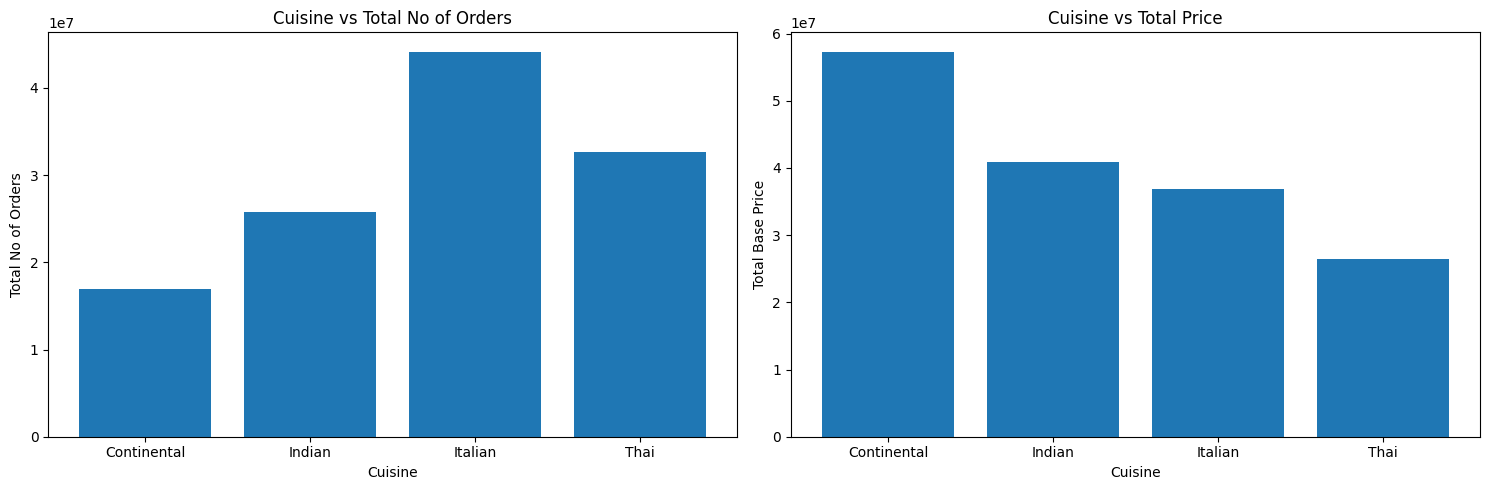

In [69]:
#let's check which cuisine is popular

cuisine_orders = merge2.groupby(['cuisine'])['num_orders'].sum().reset_index()
cuisine_price = merge2.groupby(['cuisine'])['base_price'].sum().reset_index()

fig, axs = plt.subplots(1,2, figsize=(15, 5))
axs[0].bar(cuisine_orders['cuisine'], cuisine_orders['num_orders'])
axs[0].set_title('Cuisine vs Total No of Orders')
axs[0].set_xlabel("Cuisine")
axs[0].set_ylabel("Total No of Orders")
# axs[0].annotate()
# axs[0].ylabel('Number of Orders')

axs[1].bar(cuisine_price['cuisine'], cuisine_price['base_price'])
axs[1].set_title('Cuisine vs Total Price')
axs[1].set_title('Cuisine vs Total Price')
axs[1].set_xlabel("Cuisine")
axs[1].set_ylabel("Total Base Price")

plt.tight_layout()
plt.show()

Observation: <br>

- Continental has the lowest number of order taken, but somehow, it is the most earning one out of all the cuisine!
- Italian & Thai sells the most but is generating less than other low quantity selling cuisines

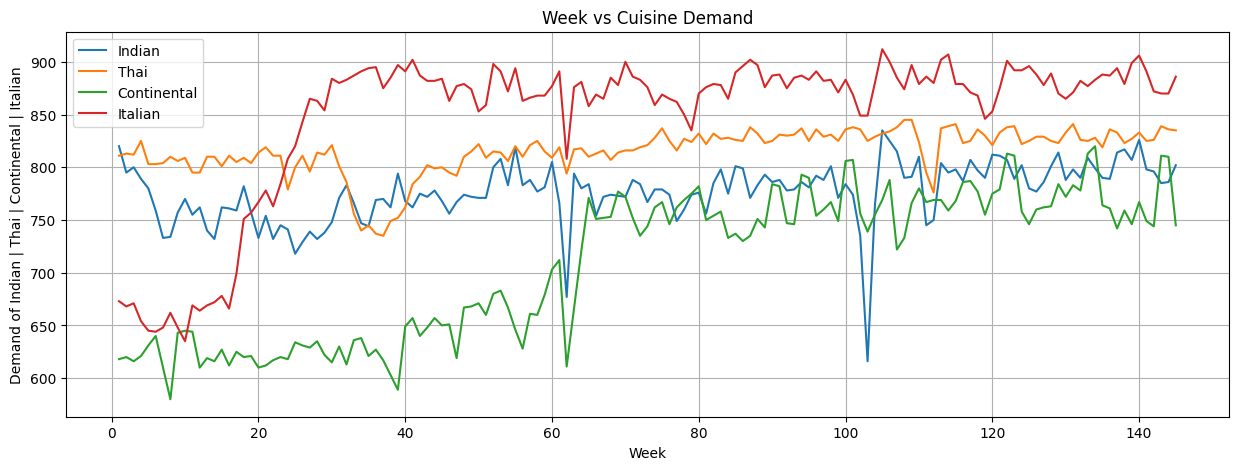

In [70]:
#Lets see What are the demand of each cuisine, this way we can forecasting on cuisine level as well

indian_weekly_demand = merge2[merge2['cuisine'] == 'Indian'].groupby('week').size().reset_index()
indian_weekly_demand = indian_weekly_demand.rename(columns={0: 'Indian'})
thai_weekly_demand = merge2[merge2['cuisine'] == 'Thai'].groupby('week').size().reset_index()
thai_weekly_demand = thai_weekly_demand.rename(columns={0: 'Thai'})
conti_weekly_demand = merge2[merge2['cuisine'] == 'Continental'].groupby('week').size().reset_index()
conti_weekly_demand = conti_weekly_demand.rename(columns={0: 'Continental'})
italian_weekly_demand = merge2[merge2['cuisine'] == 'Italian'].groupby('week').size().reset_index()
italian_weekly_demand = italian_weekly_demand.rename(columns={0: 'Italian'})

fig, axs = plt.subplots(figsize=(15,5))

axs.plot(indian_weekly_demand['week'], indian_weekly_demand['Indian'], label = 'Indian')
axs.plot(thai_weekly_demand['week'], thai_weekly_demand['Thai'], label = 'Thai')
axs.plot(conti_weekly_demand['week'], conti_weekly_demand['Continental'], label = 'Continental')
axs.plot(italian_weekly_demand['week'], italian_weekly_demand['Italian'], label = 'Italian')
plt.xlabel('Week')
plt.ylabel('Demand of Indian | Thai | Continental | Italian')
plt.legend()
plt.title('Week vs Cuisine Demand')
plt.grid(True)
plt.show()

Observations:<br>

- Demand of Italian food increased rapidly from 5th week to 40th week
- Demand of Continental food increased steadly from 0th week to 60th week, while still being least in demand compared to other cuisines
- We can 2 sudden drops in demand of all the cuisine, but Thai and italian seems to be less sensitive to the demand fluctuation

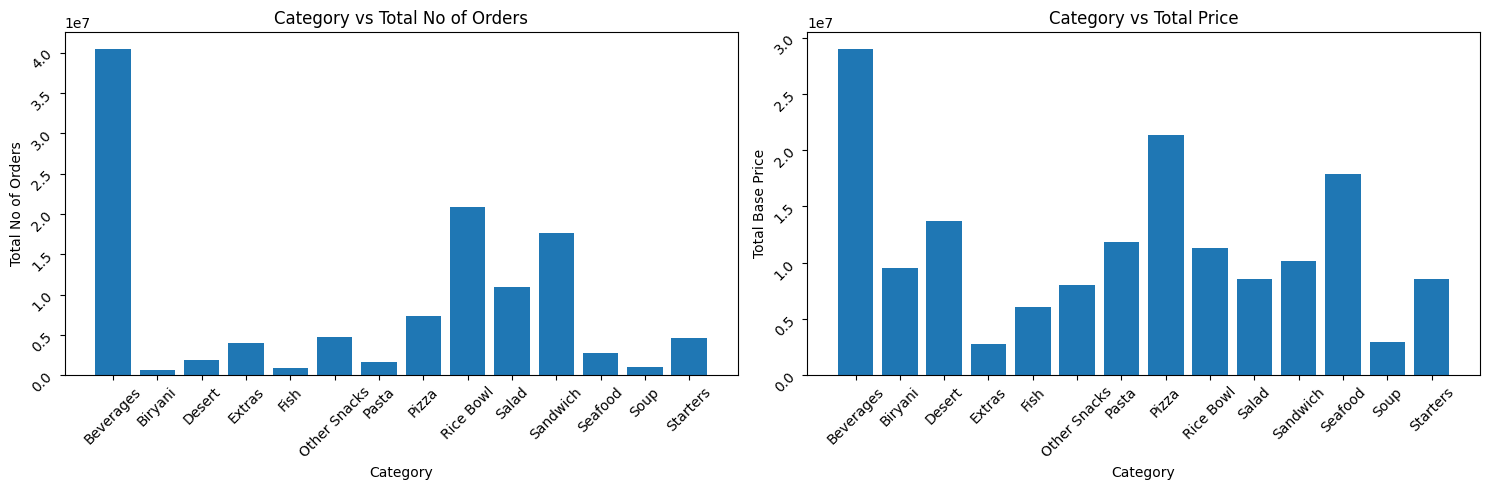

In [71]:
#let's check which CATEGORY is popular

category_orders = merge2.groupby(['category'])['num_orders'].sum().reset_index()
category_price = merge2.groupby(['category'])['base_price'].sum().reset_index()

fig, axs = plt.subplots(1,2, figsize=(15, 5))
axs[0].bar(category_orders['category'], category_orders['num_orders'])
axs[0].set_title('Category vs Total No of Orders')
axs[0].set_xlabel("Category")
axs[0].set_ylabel("Total No of Orders")
axs[0].tick_params(labelrotation=45)
# axs[0].annotate()
# axs[0].ylabel('Number of Orders')

axs[1].bar(category_price['category'], category_price['base_price'])
axs[1].set_title('Category vs Total Price')
axs[1].set_title('Category vs Total Price')
axs[1].set_xlabel("Category")
axs[1].set_ylabel("Total Base Price")
axs[1].tick_params(labelrotation=45)

plt.tight_layout()
plt.show()

Observations:<br>

- Beverages is the most sought after category, followed by Rice bowl, Sandwich, Salad & Pizza!
- Total number of seafood orders are less but its contribution in the price is big, meaning seafood is usually costlier than other.


In [72]:
merge2['category'].unique()

array(['Beverages', 'Rice Bowl', 'Starters', 'Pasta', 'Sandwich',
       'Biryani', 'Extras', 'Pizza', 'Seafood', 'Other Snacks', 'Desert',
       'Soup', 'Salad', 'Fish'], dtype=object)

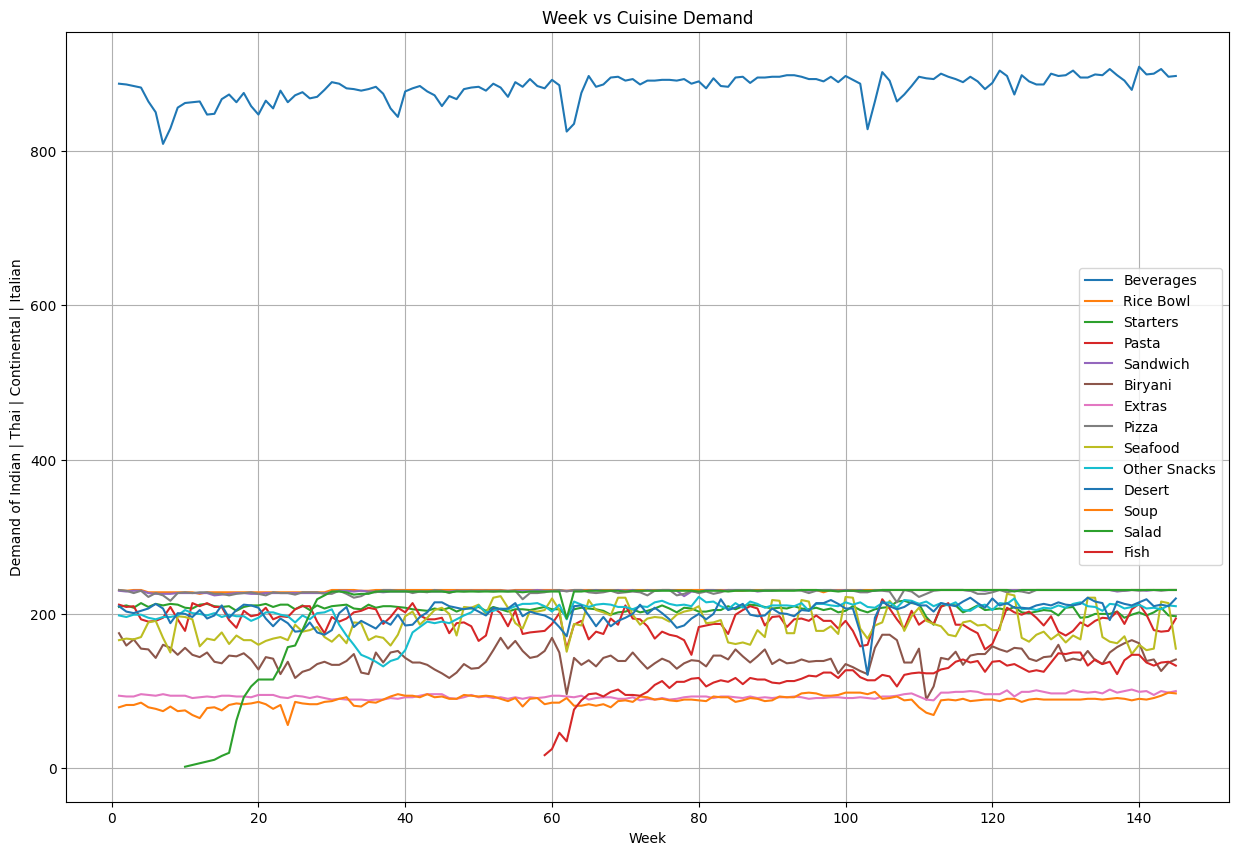

In [73]:
#Lets see What are the demand of each category, this way we can forecasting on category level as well

Beverages_weekly_demand = merge2[merge2['category'] == 'Beverages'].groupby('week').size().reset_index()
Beverages_weekly_demand = Beverages_weekly_demand.rename(columns={0: 'Beverages'})

Rice_Bowl_weekly_demand = merge2[merge2['category'] == 'Rice Bowl'].groupby('week').size().reset_index()
Rice_Bowl_weekly_demand = Rice_Bowl_weekly_demand.rename(columns={0: 'Rice Bowl'})

Starters_weekly_demand = merge2[merge2['category'] == 'Starters'].groupby('week').size().reset_index()
Starters_weekly_demand = Starters_weekly_demand.rename(columns={0: 'Starters'})

Pasta_weekly_demand = merge2[merge2['category'] == 'Pasta'].groupby('week').size().reset_index()
Pasta_weekly_demand = Pasta_weekly_demand.rename(columns={0: 'Pasta'})

Sandwich_weekly_demand = merge2[merge2['category'] == 'Sandwich'].groupby('week').size().reset_index()
Sandwich_weekly_demand = Sandwich_weekly_demand.rename(columns={0: 'Sandwich'})

Biryani_weekly_demand = merge2[merge2['category'] == 'Biryani'].groupby('week').size().reset_index()
Biryani_weekly_demand = Biryani_weekly_demand.rename(columns={0: 'Biryani'})

Extras_weekly_demand = merge2[merge2['category'] == 'Extras'].groupby('week').size().reset_index()
Extras_weekly_demand = Extras_weekly_demand.rename(columns={0: 'Extras'})

Pizza_weekly_demand = merge2[merge2['category'] == 'Pizza'].groupby('week').size().reset_index()
Pizza_weekly_demand = Pizza_weekly_demand.rename(columns={0: 'Pizza'})

Seafood_weekly_demand = merge2[merge2['category'] == 'Seafood'].groupby('week').size().reset_index()
Seafood_weekly_demand = Seafood_weekly_demand.rename(columns={0: 'Seafood'})

Snacks_weekly_demand = merge2[merge2['category'] == 'Other Snacks'].groupby('week').size().reset_index()
Snacks_weekly_demand = Snacks_weekly_demand.rename(columns={0: 'Other Snacks'})

Desert_weekly_demand = merge2[merge2['category'] == 'Desert'].groupby('week').size().reset_index()
Desert_weekly_demand = Desert_weekly_demand.rename(columns={0: 'Desert'})

Soup_weekly_demand = merge2[merge2['category'] == 'Soup'].groupby('week').size().reset_index()
Soup_weekly_demand = Soup_weekly_demand.rename(columns={0: 'Soup'})

Salad_weekly_demand = merge2[merge2['category'] == 'Salad'].groupby('week').size().reset_index()
Salad_weekly_demand = Salad_weekly_demand.rename(columns={0: 'Salad'})

Fish_weekly_demand = merge2[merge2['category'] == 'Fish'].groupby('week').size().reset_index()
Fish_weekly_demand = Fish_weekly_demand.rename(columns={0: 'Fish'})


fig, axs = plt.subplots(figsize=(15,10))

axs.plot(Beverages_weekly_demand['week'], Beverages_weekly_demand['Beverages'], label = 'Beverages')
axs.plot(Rice_Bowl_weekly_demand['week'], Rice_Bowl_weekly_demand['Rice Bowl'], label = 'Rice Bowl')
axs.plot(Starters_weekly_demand['week'], Starters_weekly_demand['Starters'], label = 'Starters')
axs.plot(Pasta_weekly_demand['week'], Pasta_weekly_demand['Pasta'], label = 'Pasta')
axs.plot(Sandwich_weekly_demand['week'], Sandwich_weekly_demand['Sandwich'], label = 'Sandwich')
axs.plot(Biryani_weekly_demand['week'], Biryani_weekly_demand['Biryani'], label = 'Biryani')
axs.plot(Extras_weekly_demand['week'], Extras_weekly_demand['Extras'], label = 'Extras')
axs.plot(Pizza_weekly_demand['week'], Pizza_weekly_demand['Pizza'], label = 'Pizza')
axs.plot(Seafood_weekly_demand['week'], Seafood_weekly_demand['Seafood'], label = 'Seafood')
axs.plot(Snacks_weekly_demand['week'], Snacks_weekly_demand['Other Snacks'], label = 'Other Snacks')
axs.plot(Desert_weekly_demand['week'], Desert_weekly_demand['Desert'], label = 'Desert')
axs.plot(Soup_weekly_demand['week'], Soup_weekly_demand['Soup'], label = 'Soup')
axs.plot(Salad_weekly_demand['week'], Salad_weekly_demand['Salad'], label = 'Salad')
axs.plot(Fish_weekly_demand['week'], Fish_weekly_demand['Fish'], label = 'Fish')
plt.xlabel('Week')
plt.ylabel('Demand of Indian | Thai | Continental | Italian')
plt.legend()
plt.title('Week vs Cuisine Demand')
plt.grid(True)
plt.show()

In [74]:
merge2

,id,week,center_id,meal_id,checkout_price,base_price,emailer_for_promotion,homepage_featured,num_orders,city_code,region_code,center_type,op_area,category,cuisine
0,1379560,1,55,1885,136.83,152.29,0,0,177,647,56,TYPE_C,2.0,Beverages,Thai
1,1466964,1,55,1993,136.83,135.83,0,0,270,647,56,TYPE_C,2.0,Beverages,Thai
2,1346989,1,55,2539,134.86,135.86,0,0,189,647,56,TYPE_C,2.0,Beverages,Thai
3,1338232,1,55,2139,339.50,437.53,0,0,54,647,56,TYPE_C,2.0,Beverages,Indian
4,1448490,1,55,2631,243.50,242.50,0,0,40,647,56,TYPE_C,2.0,Beverages,Indian
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
456543,1271326,145,61,1543,484.09,484.09,0,0,68,473,77,TYPE_A,4.5,Desert,Indian
456544,1062036,145,61,2304,482.09,482.09,0,0,42,473,77,TYPE_A,4.5,Desert,Indian
456545,1110849,145,61,2664,237.68,321.07,0,0,501,473,77,TYPE_A,4.5,Salad,Italian
456546,1147725,145,61,2569,243.50,313.34,0,0,729,473,77,TYPE_A,4.5,Salad,Italian


In [75]:
emailer = merge2.groupby(['center_id'])['emailer_for_promotion'].count().reset_index()
# merge2[merge2['emailer_for_promotion']==1].groupby(['center_id']).size().reset_index()
emailer

,center_id,emailer_for_promotion
0,10,7015
1,11,6801
2,13,7046
3,14,6041
4,17,6333
...,...,...
72,161,5591
73,162,4366
74,174,6891
75,177,5296


In [76]:
homepage = merge2.groupby(['homepage_featured'])['num_orders'].sum().reset_index()
homepage

,homepage_featured,num_orders
0,0,89899504
1,1,29657981


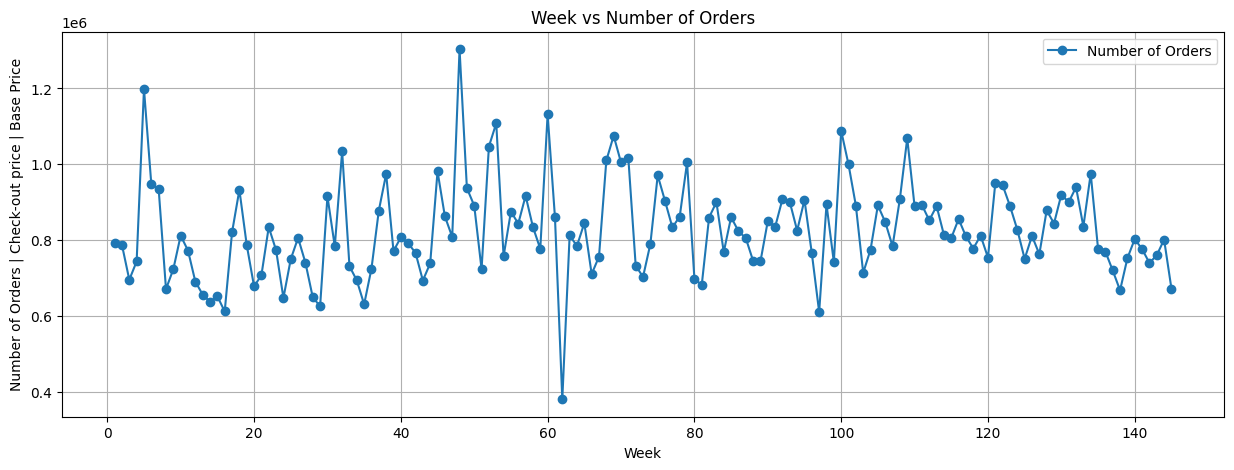

In [112]:
# See Number of orders, prices give per week

df_weekly_orders = merge2.groupby(['week'])['num_orders'].sum().reset_index()
df_weekly_checkout_prices = merge2.groupby(['week'])['checkout_price'].sum().reset_index()
df_weekly_base_price = merge2.groupby(['week'])['base_price'].sum().reset_index()
df_weekly_orders

fig, axs = plt.subplots(figsize=(15,5))

axs.plot(df_weekly_orders['week'], df_weekly_orders['num_orders'], label = 'Number of Orders', marker='o')
# axs.plot(df_weekly_checkout_prices['week'], df_weekly_checkout_prices['checkout_price'], label = 'checkout_price')
# axs.plot(df_weekly_base_price['week'], df_weekly_base_price['base_price'], label = 'Base Price')
plt.xlabel('Week')
plt.ylabel('Number of Orders | Check-out price | Base Price')
plt.legend()
plt.title('Week vs Number of Orders')
plt.grid(True)
plt.show()

In [78]:
df_weekly_orders

,week,num_orders
0,1,792261
1,2,787084
2,3,695262
3,4,743529
4,5,1198675
...,...,...
140,141,776240
141,142,739661
142,143,759926
143,144,801197


#### There are many models we need to look at: MA, WMA, ES, AR, ARMA, ARIMA, SARIMA, RNN, LSTM etc.<br>


### Auto Regressive (AR) Model

There are multiple ways to find out is the time series is stationary or not:<br>
- Visual test
- Global mean - Local mean
- ADF test (which we will choose now)

For Time series to be stationary, we need to see if the P value is less than significance value (0.05):

In [79]:
#Let's Understand is the time seriese we have is stationary or non stationary?
#lets conduct Augmented Dickey-Fuller (ADF) Test

from statsmodels.tsa.stattools import adfuller

test = adfuller(df_weekly_orders['num_orders'], autolag='AIC')
print(f'T-stat: {test[0]}')
print(f'P Value: {test[1]}')
print(f'Lags: {test[2]}')
print(f'Number of Observations used: {test[3]}')
for key, val in test[4].items():
    print(f'Critical Value at {key}: {val}')

T-stat: -2.542865772667445
P Value: 0.1053898340403121
Lags: 9
Number of Observations used: 135
Critical Value at 1%: -3.479742586699182
Critical Value at 5%: -2.88319822181578
Critical Value at 10%: -2.578319684499314


Here, we can see that P = 0.1053898340403121 which is P>0.05, then we can say that our time series is NOT stationary & vice versa<br>

This evidence is enough for us to infer that doing AR time series analysis in this model would not be fruitful but lets just go ahead with it & prove that its true!

Next move for Auto Correlation is to determine how many number of lags we should go for? we use something called "Partial Autocorrelation Function (PACF)"

We will also predict a good model by also plotting ACFs & PACFs

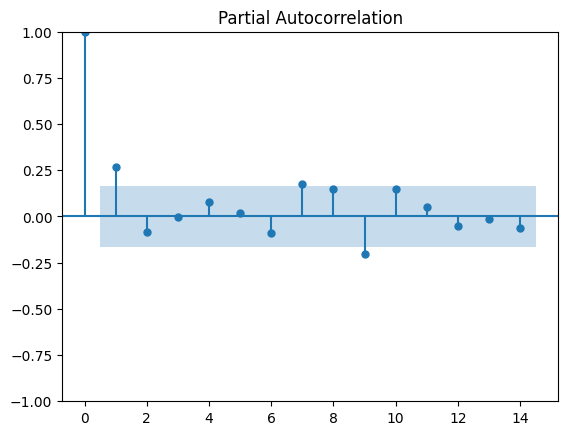

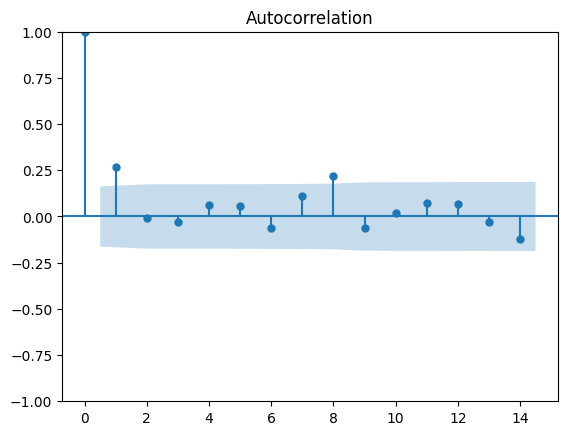

In [119]:
from statsmodels.graphics.tsaplots import plot_pacf, plot_acf

def plot_acf_pacf(y, lag):
    pacf = plot_pacf(y, lags=lag)
    acf = plot_acf(y, lags=lag)

plot_acf_pacf(df_weekly_orders['num_orders'], 14)

PACF checks "Direct" Effect of past time step to the present, unlike ACF which takes lot of "Indirect" Effects. We often choose PACF<br>

Here, we can see that only the last 2 time lag has good correlation with out present step, so we should take $lag=2$

Clearly shows that the lags after lag 2 are not correlated as such!

Which tells us that we need to try for $AR(1)~Model$:

In [113]:
train_orders = df_weekly_orders['num_orders'][:len(df_weekly_orders['num_orders'])-14]
val_orders = df_weekly_orders['num_orders'][len(df_weekly_orders['num_orders'])-14:]

In [123]:
#Auto Regressive Model for demand (number of orders)

from statsmodels.tsa.ar_model import AutoReg

#fitting model
model_AR = AutoReg(train_orders, lags=10)
model_AR_fit = model_AR.fit()

model_AR_fit.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            AutoReg Model Results                             
==============================================================================
Dep. Variable:             num_orders   No. Observations:                  131
Model:                    AutoReg(10)   Log Likelihood               -1578.041
Method:               Conditional MLE   S.D. of innovations         111605.342
Date:                Sun, 09 Mar 2025   AIC                           3180.082
Time:                        13:40:45   BIC                           3213.632
Sample:                            10   HQIC                          3193.708
                                  131                                         
==================================================================================
                     coef    std err          z      P>|z|      [0.025      0.975]
----------------------------------------------------------------------------------
const           4.228e+05   1.62e+05      2.610      0.009    1.05e+05     7.4e+05
num_orders.L1      0.3442      0.090      3.837      0.000       0.168       0.520
num_orders.L2     -0.0839      0.092     -0.912      0.362      -0.264       0.096
num_orders.L3     -0.0642      0.090     -0.717      0.473      -0.240       0.111
num_orders.L4      0.1047      0.088      1.186      0.236      -0.068       0.278
num_orders.L5      0.0640      0.088      0.728      0.467      -0.108       0.236
num_orders.L6     -0.1537      0.084     -1.819      0.069      -0.319       0.012
num_orders.L7      0.1443      0.085      1.700      0.089      -0.022       0.311
num_orders.L8      0.2199      0.085      2.575      0.010       0.053       0.387
num_orders.L9     -0.2444      0.087     -2.797      0.005      -0.416      -0.073
num_orders.L10     0.1592      0.086      1.862      0.063      -0.008       0.327
                                    Roots                                     
==============================================================================
                   Real          Imaginary           Modulus         Frequency
------------------------------------------------------------------------------
AR.1            -1.1433           -0.0000j            1.1433           -0.5000
AR.2            -0.8601           -0.6850j            1.0995           -0.3930
AR.3            -0.8601           +0.6850j            1.0995            0.3930
AR.4            -0.0800           -1.1000j            1.1029           -0.2615
AR.5            -0.0800           +1.1000j            1.1029            0.2615
AR.6             1.1530           -0.0000j            1.1530           -0.0000
AR.7             1.0207           -0.8350j            1.3188           -0.1091
AR.8             1.0207           +0.8350j            1.3188            0.1091
AR.9             0.6819           -1.1824j            1.3650           -0.1667
AR.10            0.6819           +1.1824j            1.3650            0.1667
------------------------------------------------------------------------------
"""

We can check the p value to understand which prediction is significant & which is not!<br>

Here we can see that 'num_orders.L2' is not that significant, because 0.255 >> 0.05

It shows good prediction for the 1st lag & then it goes downhill lol

In [115]:
# make predictions
yhat_AR_orders = model_AR_fit.predict(start=len(train_orders), end=len(df_weekly_orders['num_orders'])-1, dynamic=False)
yhat_AR_orders

131    839311.341985
132    824319.069877
133    826868.595731
134    829278.152710
135    829676.990384
136    829519.695660
137    829430.148785
138    829422.354079
139    829430.198279
140    829433.304984
141    829433.307210
142    829432.958789
143    829432.859446
144    829432.870340
dtype: float64

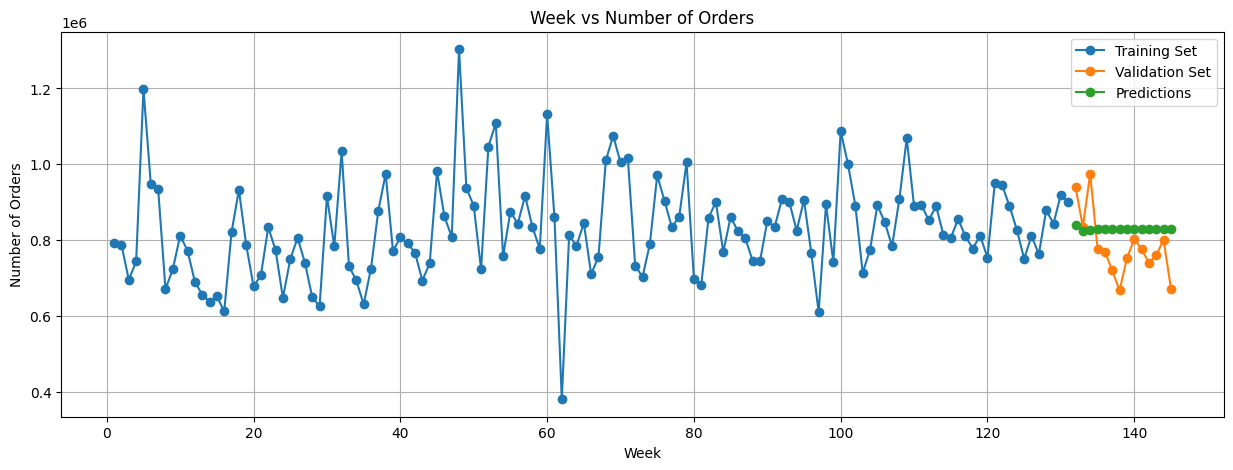

In [117]:
def plot_forecasting(X_size, y_size, train, test, prediction, name_y=str):

    fig, axs = plt.subplots(figsize=(15,5))

    axs.plot(X_size, train, label = 'Training Set', marker='o')
    axs.plot(y_size, test, label = 'Validation Set', marker='o')
    axs.plot(y_size, prediction, label = 'Predictions', marker='o')
    # axs.plot(df_weekly_checkout_prices['week'], df_weekly_checkout_prices['checkout_price'], label = 'checkout_price')
    # axs.plot(df_weekly_base_price['week'], df_weekly_base_price['base_price'], label = 'Base Price')
    plt.xlabel('Week')
    plt.ylabel(f'{name_y}')
    plt.legend()
    plt.title(f'Week vs {name_y}')
    plt.grid(True)
    plt.show()

plot_forecasting(df_weekly_orders['week'][:len(df_weekly_orders['week'])-14], df_weekly_orders['week'][len(df_weekly_orders['week'])-14:], train_orders, val_orders, yhat_AR_orders, "Number of Orders")

Our AR Time series model is over-predicting always! It's a pathetic model, It would lead to a lot of loses for the food delivery company, lets see how other models will perform

In [160]:
#Calculating loss using RMSE
def RMSE(test, predictions, name_y=str):
    from sklearn.metrics import mean_squared_error
    rmse = np.sqrt(mean_squared_error(test, predictions))
    print(f'RMSE for ({name_y} vs Week Forecasting): {rmse}')
    

RMSE_orders = RMSE(val_orders, yhat_AR_orders, 'Number of Orders')

RMSE for (Number of Orders vs Week Forecasting): 94415.78757021573


T-stat: -1.5141622446249272
P Value: 0.5264942089175407
Lags: 5
Number of Observations used: 139
Critical Value at 1%: -3.4782936965183815

Critical Value at 5%: -2.882567574015525

Critical Value at 10%: -2.5779830117488745

This Time Series Model is Non Stationary, may give bad predictions! :()

                            AutoReg Model Results                             
Dep. Variable:             base_price   No. Observations:                  138
Model:                     AutoReg(3)   Log Likelihood               -1550.885
Method:               Conditional MLE   S.D. of innovations          23602.291
Date:                Sat, 08 Mar 2025   AIC                           3111.770
Time:                        23:42:18   BIC                           3126.297
Sample:                             3   HQIC                          3117.673
                                  138                                         
                    coef    std err          z      P>|z|      [0.025

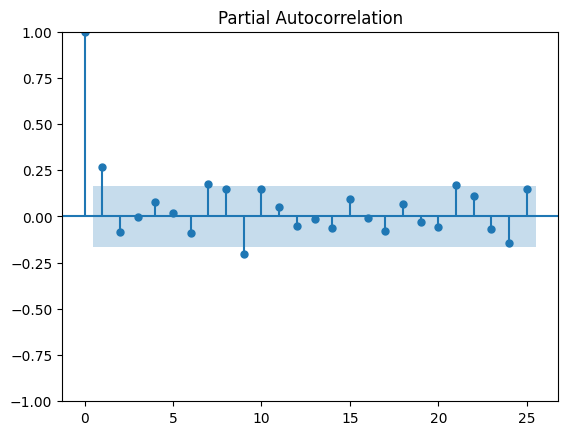

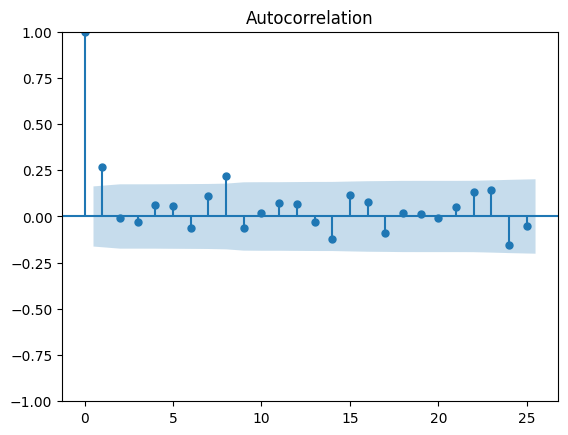

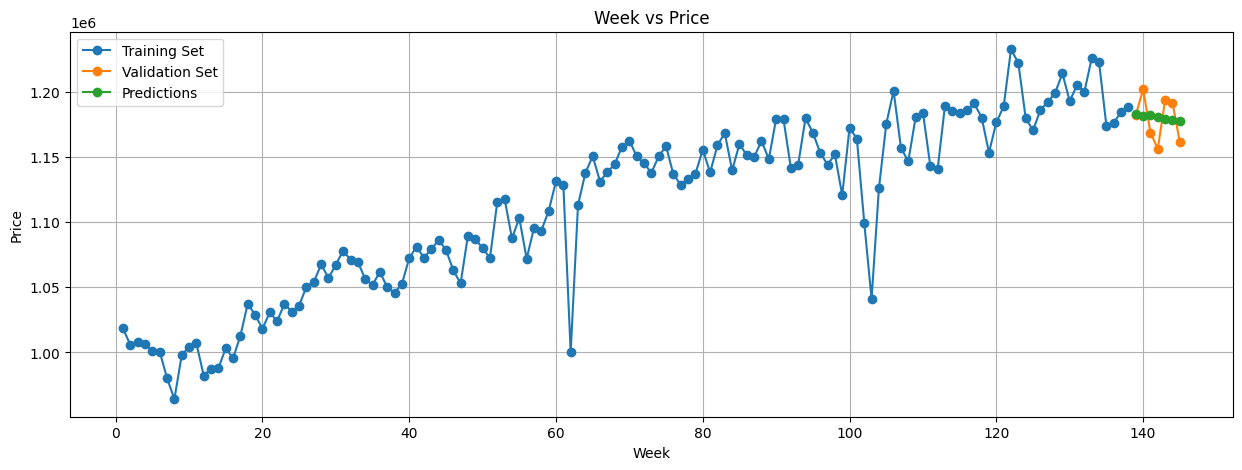

RSME for (Price vs Week Forecasting): 16292.626255893052


In [87]:
#Week vs Price

train_price = df_weekly_base_price['base_price'][:len(df_weekly_base_price['base_price'])-7]
val_price = df_weekly_base_price['base_price'][len(df_weekly_base_price['base_price'])-7:]

val_price_ = adfuller(df_weekly_base_price['base_price'], autolag='AIC')
print(f'T-stat: {val_price_[0]}')
print(f'P Value: {val_price_[1]}')
print(f'Lags: {val_price_[2]}')
print(f'Number of Observations used: {val_price_[3]}')
for key, val in val_price_[4].items():
    print(f'Critical Value at {key}: {val}\n')

if val_price_[1]>0.05:
    print('This Time Series Model is Non Stationary, may give bad predictions! :()\n')
else:
    print('This Time Series Model is Stationary, getting prediction is recommended! :)\n')

plot_acf_pacf(df_weekly_orders['num_orders'], 25)

model_AR_price = AutoReg(train_price, lags=3)
model_AR_price_fit = model_AR_price.fit()
print(model_AR_price_fit.summary())

yhat_AR_price = model_AR_price_fit.predict(start=len(train_price), end=len(df_weekly_base_price['base_price'])-1, dynamic=False)

plot_forecasting(df_weekly_base_price['week'][:len(df_weekly_base_price['week'])-7], df_weekly_base_price['week'][len(df_weekly_base_price['week'])-7:], train_price, val_price, yhat_AR_price, "Price")

RMSE_price = RMSE(val_price, yhat_AR_price, "Price")

Observation:<br>

- Auto-Regression Model doesn't really show good forecasting, this makes us to try different forecasting models...
- Here, we can see that P = 0.5264942089175407 which is P>>>0.05, then we can say that our time series is NOT stationary & vice versa<br>

This evidence is enough for us to infer that doing AR time series analysis in this model would not be fruitful but lets just go ahead with it & prove that its true!

- As this Time series is not stationary, it is also because the mean is not constant (which makes the time series "not predictable")
- Lets just remove non stationarity from the time series data & test again (we will check if there is an improvement or not)


In [88]:
indian_weekly_demand

,week,Indian
0,1,820
1,2,795
2,3,800
3,4,789
4,5,780
...,...,...
140,141,798
141,142,796
142,143,785
143,144,786


T-stat: -1.8483074462751814
P Value: 0.3567555851729117
Lags: 7
Number of Observations used: 137
Critical Value at 1%: -3.479007355368944

Critical Value at 5%: -2.8828782366015093

Critical Value at 10%: -2.5781488587564603

This Time Series Model is Non Stationary, may give bad predictions! :(

                            AutoReg Model Results                             
Dep. Variable:                 Indian   No. Observations:                  138
Model:                     AutoReg(3)   Log Likelihood                -619.477
Method:               Conditional MLE   S.D. of innovations             23.802
Date:                Sat, 08 Mar 2025   AIC                           1248.954
Time:                        23:42:22   BIC                           1263.481
Sample:                             3   HQIC                          1254.857
                                  138                                         
                 coef    std err          z      P>|z|      [0.025    

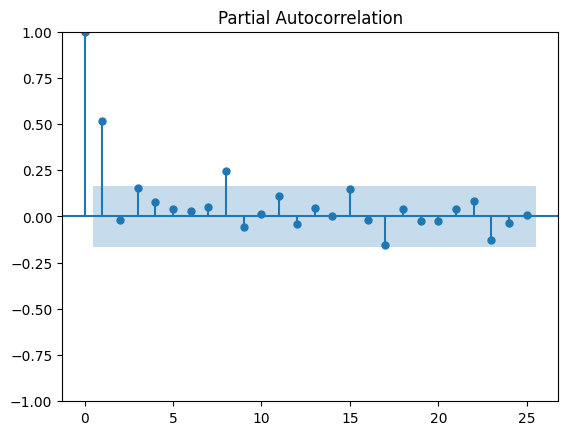

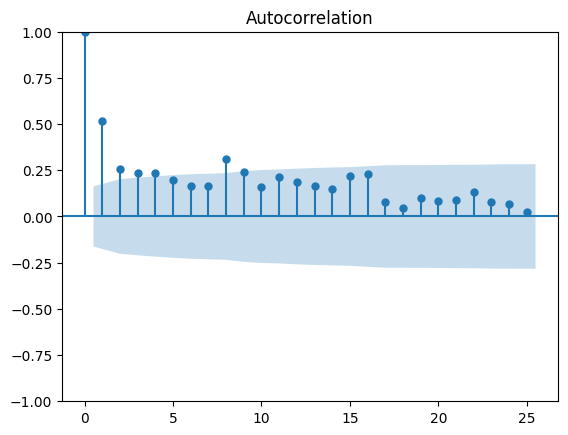

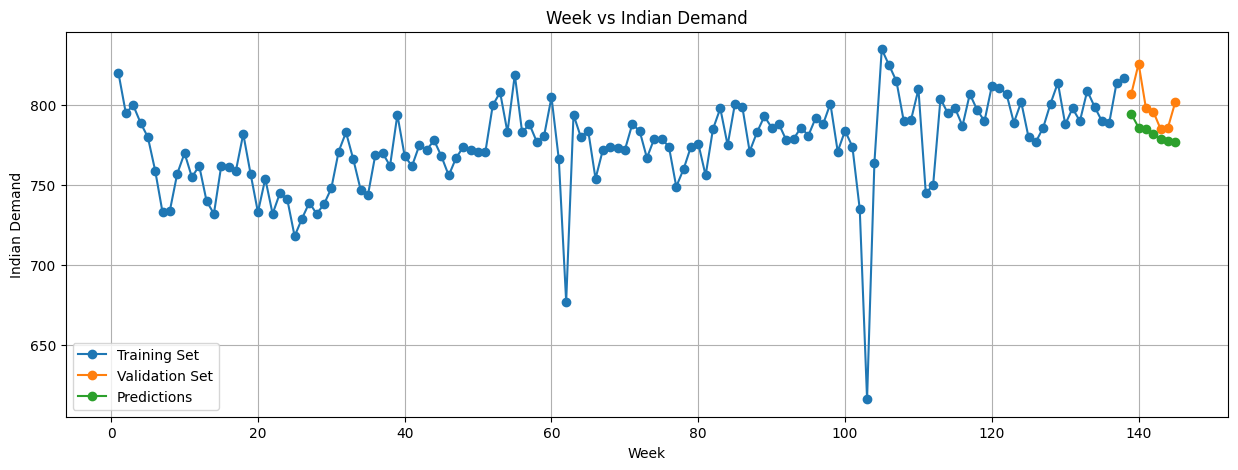

RSME for (Indian Demand vs Week Forecasting): 20.23715575266657


In [89]:
#Week vs Price

train_indian = indian_weekly_demand['Indian'][:len(indian_weekly_demand['Indian'])-7]
val_indian = indian_weekly_demand['Indian'][len(indian_weekly_demand['Indian'])-7:]

val_indian_ = adfuller(indian_weekly_demand['Indian'], autolag='AIC')
print(f'T-stat: {val_indian_[0]}')
print(f'P Value: {val_indian_[1]}')
print(f'Lags: {val_indian_[2]}')
print(f'Number of Observations used: {val_indian_[3]}')
for key, val in val_indian_[4].items():
    print(f'Critical Value at {key}: {val}\n')

if val_indian_[1]>0.05:
    print('This Time Series Model is Non Stationary, may give bad predictions! :(\n')
else:
    print('This Time Series Model is Stationary, getting prediction is recommended! :)\n')

plot_acf_pacf(indian_weekly_demand['Indian'], 25)

model_AR_indian = AutoReg(train_indian, lags=3)
model_AR_indian_fit = model_AR_indian.fit()
print(model_AR_indian_fit.summary())

yhat_AR_indian = model_AR_indian_fit.predict(start=len(train_indian), end=len(indian_weekly_demand['Indian'])-1, dynamic=False)

plot_forecasting(indian_weekly_demand['week'][:len(indian_weekly_demand['week'])-7], indian_weekly_demand['week'][len(indian_weekly_demand['week'])-7:], train_indian, val_indian, yhat_AR_indian, "Indian Demand")

RMSE_indian = RMSE(val_indian, yhat_AR_indian, "Indian Demand")

Observations:<br>
- The RMSE is better than other AR models we have saw before, but the model is still giving a pessimist prediction.
- Here, we can see that P = 0.3567555851729117 which is P>>0.05, then we can say that our time series is NOT stationary & vice versa<br>

This evidence is enough for us to infer that doing AR time series analysis in this model would not be fruitful but lets just go ahead with it & prove that its true!


#### Lets Try to Convert this NON-STATIONARY Time Series into STATIONARY

We will condut First Order Differencing:<br>

$Y^{'}_t = Y_t - Y_{t-1}$

In [126]:
'''We need to convert This NON STATIONARY TS into STATIONARY TS using FIRST ORDER DIFFERENCING'''

df_weekly_orders.head()

,week,num_orders
0,1,792261
1,2,787084
2,3,695262
3,4,743529
4,5,1198675


In [127]:
orders_diff = df_weekly_orders['num_orders'].diff().dropna() #we can add params like periods=1, axis=0 (rows default)
orders_diff

1       -5177.0
2      -91822.0
3       48267.0
4      455146.0
5     -251387.0
         ...   
140    -26449.0
141    -36579.0
142     20265.0
143     41271.0
144   -129271.0
Name: num_orders, Length: 144, dtype: float64

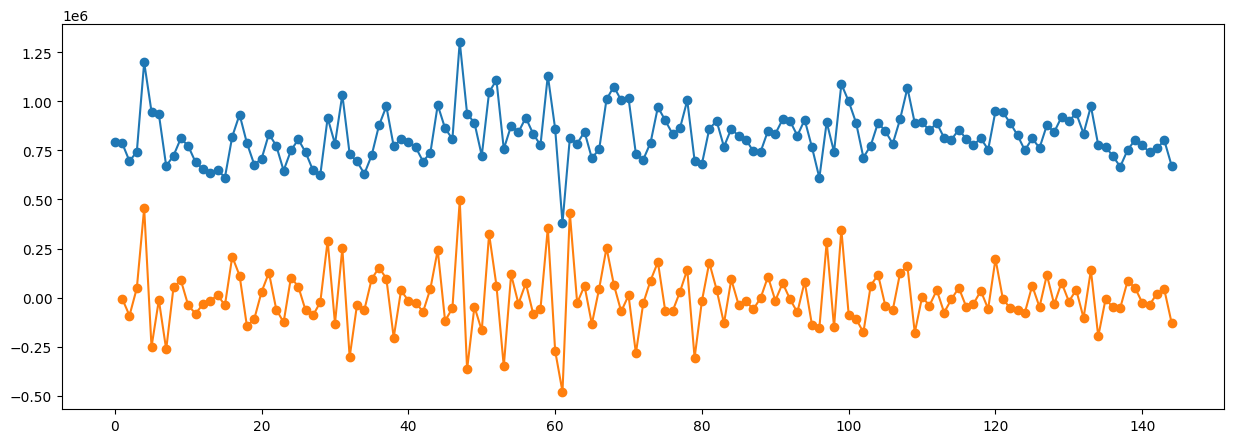

In [132]:
plt.figure(figsize=(15,5))
plt.plot(df_weekly_orders['num_orders'], marker='o')
plt.plot(orders_diff, marker='o')

plt.show()

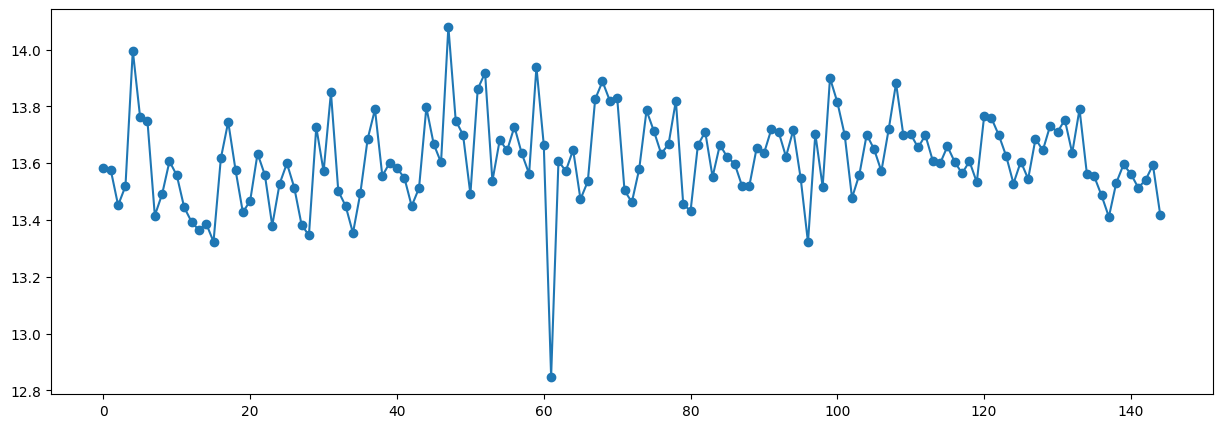

In [133]:
'''Logrithmic Transformation'''

df_weekly_orders['num_orders'] = np.log(df_weekly_orders['num_orders'])
plt.figure(figsize=(15,5))
plt.plot(df_weekly_orders['num_orders'], marker='o')
# plt.plot(orders_diff, marker='o')

plt.show()

In [135]:
orders_diff = df_weekly_orders['num_orders'].diff().dropna() #we can add params like periods=1, axis=0 (rows default)
orders_diff

1     -0.006556
2     -0.124046
3      0.067119
4      0.477564
5     -0.235369
         ...   
140   -0.033506
141   -0.048270
142    0.027029
143    0.052886
144   -0.175959
Name: num_orders, Length: 144, dtype: float64

First Aim for variance (log transform), then for mean (differencing)


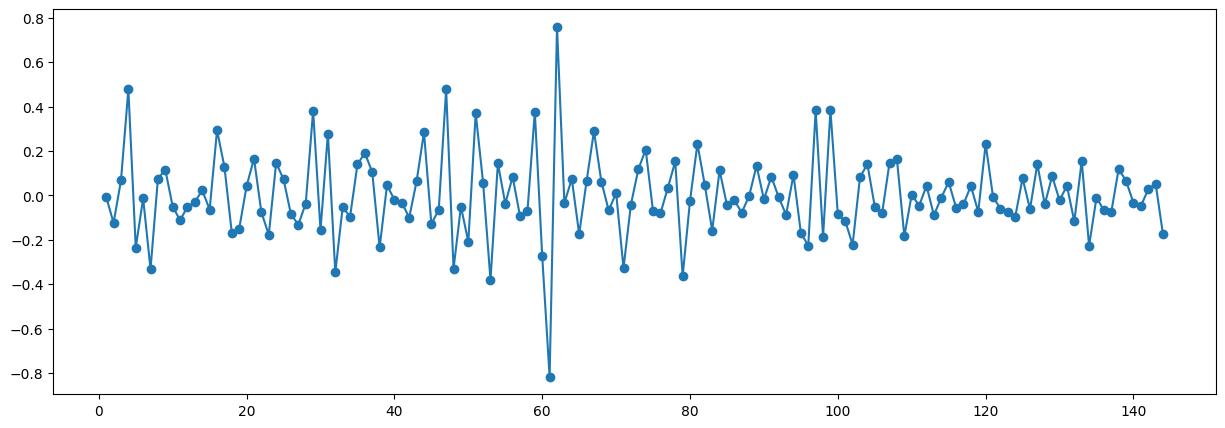

In [136]:
plt.figure(figsize=(15,5))
# plt.plot(df_weekly_orders['num_orders'], marker='o')
plt.plot(orders_diff, marker='o')

plt.show()

In [140]:
orders_diff[:len(orders_diff)-7]

1     -0.006556
2     -0.124046
3      0.067119
4      0.477564
5     -0.235369
         ...   
140   -0.033506
141   -0.048270
142    0.027029
143    0.052886
144   -0.175959
Name: num_orders, Length: 144, dtype: float64

In [151]:
train_order_diff = orders_diff[:len(orders_diff)-10]
val_order_diff = orders_diff[len(orders_diff)-10:]

In [152]:
order_diff_ = adfuller(orders_diff, autolag='AIC')
print(f'T-stat: {order_diff_[0]}')
print(f'P Value: {order_diff_[1]}')
print(f'Lags: {order_diff_[2]}')
print(f'Number of Observations used: {order_diff_[3]}')
for key, val in order_diff_[4].items():
    print(f'Critical Value at {key}: {val}\n')

if order_diff_[1]>0.05:
    print('This Time Series Model is Non Stationary, may give bad predictions! :(\n')
else:
    print('This Time Series Model is Stationary, getting prediction is recommended! :)\n')

T-stat: -6.379333620710897
P Value: 2.2425181406042702e-08
Lags: 9
Number of Observations used: 134
Critical Value at 1%: -3.480118600110386

Critical Value at 5%: -2.8833618426136196

Critical Value at 10%: -2.578407034974382

This Time Series Model is Stationary, getting prediction is recommended! :)



AWESOME, We can see that our TS Model is now STATIONARY!, Lets conduct ACF & PACF to find correlation different time steps

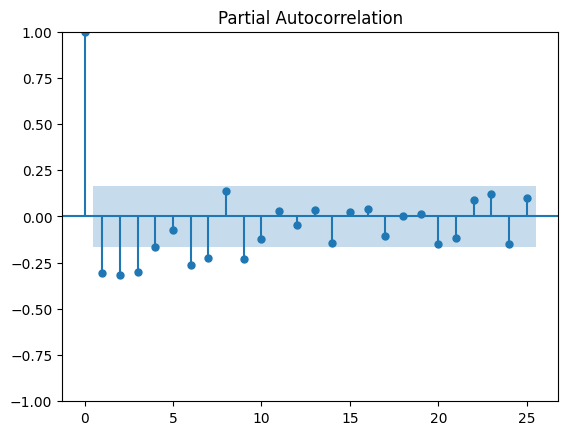

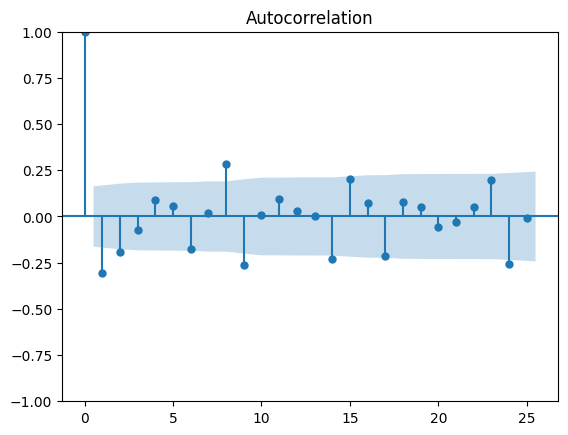

In [153]:
plot_acf_pacf(orders_diff, 25)

                            AutoReg Model Results                             
Dep. Variable:             num_orders   No. Observations:                  134
Model:                     AutoReg(5)   Log Likelihood                  53.746
Method:               Conditional MLE   S.D. of innovations              0.160
Date:                Sun, 09 Mar 2025   AIC                            -93.491
Time:                        15:16:35   BIC                            -73.472
Sample:                             5   HQIC                           -85.357
                                  134                                         
                    coef    std err          z      P>|z|      [0.025      0.975]
---------------------------------------------------------------------------------
const            -0.0006      0.014     -0.045      0.964      -0.028       0.027
num_orders.L1    -0.5833      0.088     -6.614      0.000      -0.756      -0.410
num_orders.L2    -0.5457      0.098     

/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: An unsupported index was provided. As a result, forecasts cannot be generated. To use the model for forecasting, use one of the supported classes of index.
  self._init_dates(dates, freq)
/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/statsmodels/tsa/base/tsa_model.py:837: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(
/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/statsmodels/tsa/base/tsa_model.py:837: FutureWarning: No supported index is available. In the next version, calling this method in a model without a supported index will result in an exception.
  return get_prediction_index(


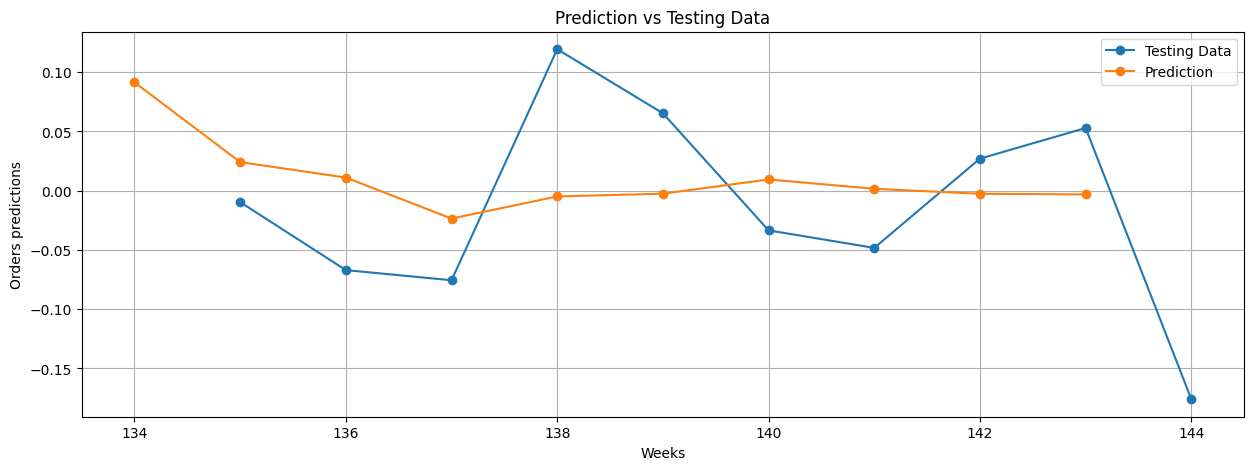

RMSE for (Number of Orders vs Week Forecasting): 0.09446368953532518


In [161]:
model_order_diff = AutoReg(train_order_diff, lags=5)
model_order_diff_fit = model_order_diff.fit()
print(model_order_diff_fit.summary())

yhat_order_diff = model_order_diff_fit.predict(start=len(train_order_diff), end=len(orders_diff)-1, dynamic=False)

plt.figure(figsize=(15,5))
# plt.plot(train_order_diff)
plt.plot(val_order_diff, label='Testing Data', marker='o')
plt.plot(yhat_order_diff, label='Prediction', marker='o')
plt.xlabel('Weeks')
plt.ylabel("Orders predictions")
plt.title('Prediction vs Testing Data')
plt.legend()
plt.grid(True)
plt.show()

RMSE_indian = RMSE(val_order_diff, yhat_order_diff, "Number of Orders")

In [163]:
def inverse_log(df):
    return np.exp(df)

inverse_log(yhat_order_diff)

134    1.095701
135    1.024394
136    1.011115
137    0.976747
138    0.995142
139    0.997455
140    1.009511
141    1.001607
142    0.997381
143    0.996826
dtype: float64